<a href="https://colab.research.google.com/github/AntoninaKOR/labs/blob/main/lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Conv1D, GRU, Flatten, Reshape, MaxPooling1D
from tensorflow.keras.optimizers import RMSprop
import os
import keras
import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

#Первый этап.

In [ ]:
max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
    num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


##Модель

In [ ]:
model = Sequential()
model.add(Embedding(max_features, 64))
model.add(GRU(64))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="model_1.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(input_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.5728 - loss: 0.6696 - val_accuracy: 0.6432 - val_loss: 0.6380
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.7876 - loss: 0.4506 - val_accuracy: 0.7784 - val_loss: 0.4686
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8482 - loss: 0.3596 - val_accuracy: 0.8568 - val_loss: 0.3388
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.8650 - loss: 0.3257 - val_accuracy: 0.8638 - val_loss: 0.3596
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.8760 - loss: 0.3006 - val_accuracy: 0.8566 - val_loss: 0.3590
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.8966 - loss: 0.2613 - val_accuracy: 0.8354 - val_loss: 0.4594
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9028 - loss: 0.2457 - val_accuracy: 0.8652 - val_loss: 0.3513
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9220 - loss: 0.1998 - val_acc

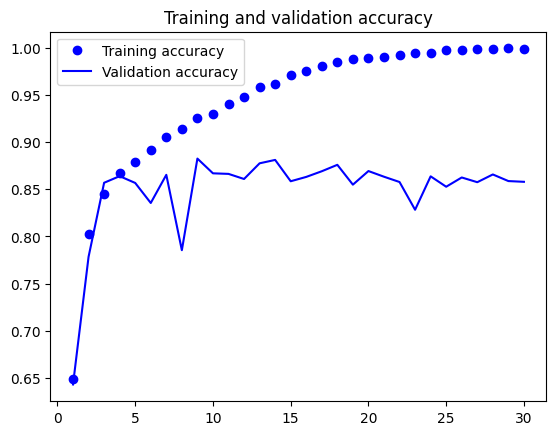

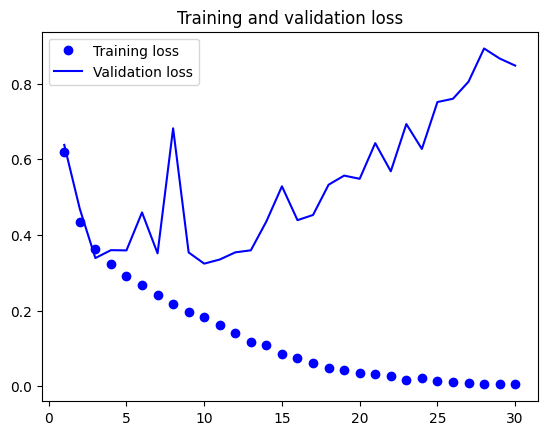

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

##Базовая модель

In [ ]:
basic_model = Sequential()
basic_model.add(Conv1D(100, 5, activation='relu', input_shape=(500, 1)))
basic_model.add(MaxPooling1D(3))
basic_model.add(Conv1D(200, 5, activation='relu'))
basic_model.add(MaxPooling1D(3))
basic_model.add(Conv1D(400, 5, activation='relu'))
basic_model.add(Flatten())
basic_model.add(Dense(1, activation='sigmoid'))
basic_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)                    │ (None, 496, 100)            │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 165, 100)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_2 (Conv1D)                    │ (None, 161, 200)            │         100,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 53, 200)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_3 (Conv1D)                    │ (None, 49, 400)             │         400,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 19600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │          19,601 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 520,801 (1.99 MB)

 Trainable params: 520,801 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
basic_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="basic_model_1.keras",
        save_best_only=True,
        monitor="val_loss")
]
basic_model.fit(np.expand_dims(input_train, -1), y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 43ms/step - acc: 0.5034 - loss: 103.9236 - val_acc: 0.5074 - val_loss: 0.8636
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.4983 - loss: 0.7430 - val_acc: 0.5006 - val_loss: 1.3132
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - acc: 0.5128 - loss: 0.7250 - val_acc: 0.4922 - val_loss: 0.6934
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.5058 - loss: 0.7082 - val_acc: 0.4846 - val_loss: 0.7019
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.5054 - loss: 0.7132 - val_acc: 0.4976 - val_loss: 0.6956
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - acc: 0.5057 - loss: 0.6961 - val_acc: 0.4948 - val_loss: 0.6932
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.5040 - loss: 0.6937 - val_acc: 0.4906 - val_loss: 0.6937
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.4988 - loss: 0.6933 - val_acc: 0.4930 - val_loss: 0.6936
Epoch 9/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 17

##Сравнение на тестовой выборке

In [ ]:
res = model.evaluate(input_test, y_test)
bas_res = basic_model.evaluate(np.expand_dims(input_test, -1), y_test)
print(f"Точность модели на тестовой выборке: {res[1]} \n Точность базовой модели на тестовой выборке {bas_res[1]}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.8542 - loss: 0.9043
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - acc: 0.5077 - loss: 0.7049
Точность модели на тестовой выборке: 0.8570799827575684 
 Точность базовой модели на тестовой выборке 0.5076799988746643


#Второй этап.

In [ ]:
zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
csv_path, _ = os.path.splitext(zip_path)
df = pd.read_csv(csv_path)
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
df= df.to_numpy()
df

13568290/13568290 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


array([[ 9.9652e+02, -8.0200e+00,  2.6540e+02, ...,  1.0300e+00,
         1.7500e+00,  1.5230e+02],
       [ 9.9657e+02, -8.4100e+00,  2.6501e+02, ...,  7.2000e-01,
         1.5000e+00,  1.3610e+02],
       [ 9.9653e+02, -8.5100e+00,  2.6491e+02, ...,  1.9000e-01,
         6.3000e-01,  1.7160e+02],
       ...,
       [ 9.9982e+02, -3.1600e+00,  2.7001e+02, ...,  1.0800e+00,
         2.0000e+00,  2.1520e+02],
       [ 9.9981e+02, -4.2300e+00,  2.6894e+02, ...,  1.4900e+00,
         2.1600e+00,  2.2580e+02],
       [ 9.9982e+02, -4.8200e+00,  2.6836e+02, ...,  1.2300e+00,
         1.9600e+00,  1.8490e+02]])

In [ ]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),
                            lookback // step,
                            data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [ ]:
lookback = 60*24//10*10
step = 60//10
delay = 60*24//10
batch_size = 128
train_gen = generator(df,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)
val_gen = generator(df,
                      lookback=lookback,
                      delay=delay,
                      min_index=200001,
                      max_index=300000,
                      step=step,
                      batch_size=batch_size)
test_gen = generator(df,
                      lookback=lookback,
                      delay=delay,
                      min_index=300001,
                      max_index=None,
                      step=step,
                      batch_size=batch_size)
train_df = tf.data.Dataset.from_generator(lambda: train_gen,output_types=(tf.float32, tf.int32)
                       )
val_df = tf.data.Dataset.from_generator(lambda: val_gen,
                                             output_types=(tf.float32, tf.int32))
test_df = tf.data.Dataset.from_generator(lambda: test_gen,
                                             output_types=(tf.float32, tf.int32))
val_steps = (300000 - 200001 - lookback) // batch_size
test_steps = (len(df) - 300001 - lookback) // batch_size

##Модель

In [ ]:
model = Sequential()
model.add(SimpleRNN(128, dropout = 0.4,  input_shape=(None, df.shape[-1]), return_sequences=True, return_state=False))
model.add(SimpleRNN(32, dropout = 0.4))
model.add(Dense(1))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, None, 128)           │          18,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 32)                  │           5,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,489 (91.75 KB)

 Trainable params: 23,489 (91.75 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer=RMSprop(), loss='mae', metrics=['mse'])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="model_2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(train_gen,
                              steps_per_epoch=500,
                              epochs=30,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 44s 81ms/step - loss: 7.5361 - mse: 86.5898 - val_loss: 4.8552 - val_mse: 35.6160
Epoch 2/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 39s 79ms/step - loss: 5.8763 - mse: 55.7306 - val_loss: 3.7200 - val_mse: 22.1153
Epoch 3/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - loss: 5.1784 - mse: 43.7698 - val_loss: 3.9535 - val_mse: 24.1448
Epoch 4/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - loss: 4.9411 - mse: 39.8951 - val_loss: 3.7217 - val_mse: 21.5736
Epoch 5/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - loss: 4.8212 - mse: 37.8386 - val_loss: 4.1925 - val_mse: 26.6417
Epoch 6/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - loss: 4.7843 - mse: 37.2118 - val_loss: 3.8573 - val_mse: 22.8124
Epoch 7/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 80ms/step - loss: 4.7129 - mse: 36.2645 - val_loss: 3.7377 - val_mse: 21.4169
Epoch 8/30
500/500 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - loss: 4.6429 - mse: 35.4408 - val_loss: 4.5183 - val_mse: 30.8127
Epoch 9/30
500/500 ━━━━━

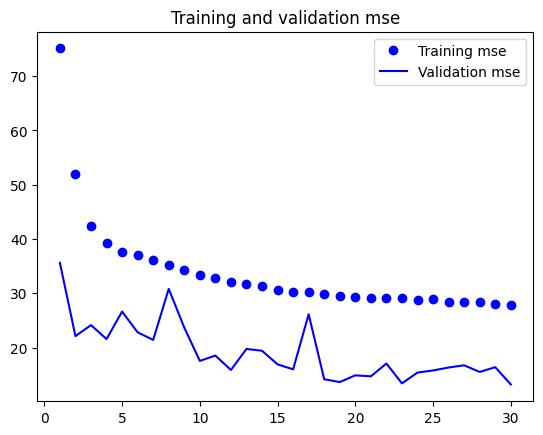

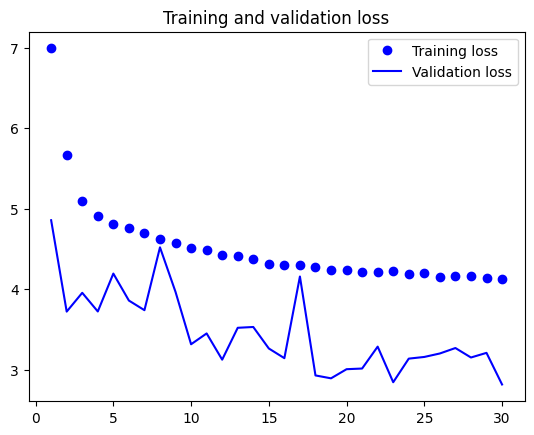

In [ ]:
accuracy = history.history["mse"]
val_accuracy = history.history["val_mse"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training mse")
plt.plot(epochs, val_accuracy, "b", label="Validation mse")
plt.title("Training and validation mse")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

##Базовая модель

In [ ]:
basic_model = Sequential()
basic_model.add(Conv1D(20, 10, activation='relu', input_shape=(240, 14)))
basic_model.add(MaxPooling1D(3))
basic_model.add(Conv1D(20, 10, activation='relu'))
basic_model.add(MaxPooling1D(3))
basic_model.add(Conv1D(20, 10, activation='relu'))
basic_model.add(SimpleRNN(128, dropout = 0.4, return_sequences=True, return_state=False))
basic_model.add(SimpleRNN(32, dropout = 0.4))
basic_model.add(Dense(1))
basic_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 231, 20)             │           2,820 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_2 (MaxPooling1D)       │ (None, 77, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 68, 20)              │           4,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 22, 20)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_6 (Conv1D)                    │ (None, 13, 20)              │           4,020 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 13, 128)             │          19,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_3 (SimpleRNN)             │ (None, 32)                  │           5,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 35,117 (137.18 KB)

 Trainable params: 35,117 (137.18 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
basic_model.compile(optimizer=RMSprop(), loss='mae',  metrics=['mse'])
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="basic_model_2.keras",
        save_best_only=True,
        monitor="val_loss")
]
basic_model.fit(train_gen,
                              steps_per_epoch=300,
                              epochs=30,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - loss: 7.6482 - mse: 88.1754 - val_loss: 6.7603 - val_mse: 67.2909
Epoch 2/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 7.0886 - mse: 76.1477 - val_loss: 6.7615 - val_mse: 67.3095
Epoch 3/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 7.0905 - mse: 77.0486 - val_loss: 6.7590 - val_mse: 67.2754
Epoch 4/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 7.0929 - mse: 76.2915 - val_loss: 6.7581 - val_mse: 67.3193
Epoch 5/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - loss: 7.0448 - mse: 75.4076 - val_loss: 6.7578 - val_mse: 67.2736
Epoch 6/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - loss: 7.1309 - mse: 76.9742 - val_loss: 6.7579 - val_mse: 67.2714
Epoch 7/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 12s 41ms/step - loss: 7.1351 - mse: 77.0818 - val_loss: 6.7581 - val_mse: 67.2705
Epoch 8/30
300/300 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - loss: 7.1318 - mse: 77.3826 - val_loss: 6.7586 - val_mse: 67.2719
Epoch 9/30
300/300 ━━━━━━

##Cравнение

In [ ]:
res = model.evaluate(test_gen, steps = test_steps)
bas_res = basic_model.evaluate(test_gen, steps = test_steps)
print(f"Точность модели на тестовой выборке: {res[1]} \n Точность базовой модели на тестовой выборке {bas_res[1]}")

930/930 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - loss: 2.8389 - mse: 13.8668
930/930 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - loss: 6.0957 - mse: 54.6408
Точность модели на тестовой выборке: 14.49215030670166 
 Точность базовой модели на тестовой выборке 61.77782440185547
